# OrbiPy
### Extensive orbital dynamics research tool for CRTBP and beyond

### Tutorial 0

In [1]:
import orbipy as op
import numpy as np
import pandas as pd

### Main object is Model
OrbiPy currently support only CRTBP model

In [2]:
model = op.crtbp3_model()

### Model consists of constants, right part of ODE system of motion, integrator instance

### Constant sets already supported:

In [3]:
model.constants_df

,M,m,mu,R,T,comments
Sun-Earth (default),Sun,Earth,0.000003,1.496000e+08,31536000.0,Default constant set for Sun-Earth system
Earth-Moon (default),Earth,Moon,0.012158,3.844000e+05,2358720.0,Default constant set for Earth-Moon system
Sun-Venus (2026-12-05),Sun,Venus,0.000002,1.076024e+08,19414080.0,Venus-D project constant set for Sun-Venus @ 2...
Extreme 0.49,M,m,0.490000,1.000000e+00,1.0,Extreme constant set


In [4]:
print('Constants are stored in:', model.constants_csv)

Constants are stored in: /home/tka4nik/Workdir/diploma/orbipy/orbipy/data/crtbp_constants.csv


### By default model created with 'Sun-Earth (default)' constant set:

In [5]:
model.constants

array([3.00134839e-06, 1.49600000e+08, 3.15360000e+07])

In [6]:
model.mu, model.R, model.T

(np.float64(3.001348389698916e-06),
 np.float64(149600000.0),
 np.float64(31536000.0))

In [7]:
print('Integrator by default', model.integrator)

Integrator by default <orbipy.integrators.dop853_integrator object at 0x7fbf7e62cd70>


In [8]:
print('Right part by default', model.right_part)

Right part by default <built-in method crtbp_ode of _dynfunc._Closure object at 0x7fbf7e62a9e0>


In [9]:
print('State Transition Matrix is turned %s' % ('on' if model.stm else 'off'))

State Transition Matrix is turned off


### Create model with Earth-Moon constant set and dopri5 integrator with STM calculation

In [10]:
em_model = op.crtbp3_model('Earth-Moon (default)', integrator=op.dopri5_integrator(), stm=True)

In [11]:
em_model.const_set, em_model.constants

('Earth-Moon (default)',
 array([1.21580182e-02, 3.84400000e+05, 2.35872000e+06]))

In [12]:
em_model.mu, em_model.R, em_model.T

(np.float64(0.0121580182480061), np.float64(384400.0), np.float64(2358720.0))

### Get zero state vector

In [13]:
model.get_zero_state()

array([0., 0., 0., 0., 0., 0.])

In [14]:
em_model.get_zero_state()

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 0., 0., 0., 1.])

### Lagrange points

In [15]:
model.L1, model.L2, model.L3

(np.float64(0.9900289479871328),
 np.float64(1.0100317349912604),
 np.float64(-1.000001250561829))

In [16]:
# all 5 points
model.L

array([[ 0.99002895,  0.        ,  0.        ],
       [ 1.01003173,  0.        ,  0.        ],
       [-1.00000125,  0.        ,  0.        ],
       [ 0.499997  ,  0.8660254 ,  0.        ],
       [ 0.499997  , -0.8660254 ,  0.        ]])

### Create initial state

Sun-Earth (default)

In [17]:
s0 = model.get_zero_state()
s0[0] = model.L2 - 500000/model.R
s0[2] = 500000/model.R

### Integrate initial state for pi time units and return DataFrame

In [18]:
df = model.prop(s0, 0.0, np.pi)
df.head()

,t,x,y,z,vx,vy,vz
0,0.000000,1.006689,0.000000e+00,0.003342,0.000000,0.000000,0.000000
1,0.025083,1.006681,1.474565e-07,0.003334,-0.000704,0.000018,-0.000684
2,0.092627,1.006568,7.455716e-06,0.003225,-0.002662,0.000242,-0.002541
3,0.149372,1.006366,3.148386e-05,0.003035,-0.004476,0.000637,-0.004149
4,0.197929,1.006107,7.385785e-05,0.002799,-0.006263,0.001134,-0.005587


### Create initial state

Earth-Moon (default)

In [19]:
s0 = em_model.get_zero_state()
s0[0] = em_model.L2 - 20000/em_model.R
s0[2] = 20000/em_model.R

### Integrate initial state for pi time units and return numpy array instead of DataFrame

In [20]:
em_arr = em_model.prop(s0, 0.0, np.pi, ret_df=False)
em_arr

array([[ 0.00000000e+00,  1.10368161e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  1.00000000e+00],
       [ 7.87154565e-04,  1.10368149e+00,  6.09470723e-11, ...,
         2.09304216e-06,  1.09836559e-09,  9.99998869e-01],
       [ 2.91431727e-03,  1.10368002e+00,  3.09303355e-09, ...,
         2.86906435e-05,  5.57427482e-08,  9.99984494e-01],
       ...,
       [ 3.13562445e+00,  8.76290866e-01, -2.71591616e-02, ...,
        -3.62925529e-02,  4.76396633e-01,  2.67650205e-01],
       [ 3.13903754e+00,  8.76478070e-01, -2.70628554e-02, ...,
        -3.62842092e-02,  4.61127108e-01,  2.55496485e-01],
       [ 3.14159265e+00,  8.76622615e-01, -2.69898690e-02, ...,
        -3.62803030e-02,  4.49545885e-01,  2.46314393e-01]])

### Plotter object for projection plotting

In [21]:
plotter = op.plotter.from_model(model, length_units='Mm', velocity_units='km/s')

array([<Axes: xlabel='x, ${\\cdot}10^3$ km', ylabel='y, ${\\cdot}10^3$ km'>,
       <Axes: xlabel='x, ${\\cdot}10^3$ km', ylabel='z, ${\\cdot}10^3$ km'>,
       <Axes: xlabel='y, ${\\cdot}10^3$ km', ylabel='z, ${\\cdot}10^3$ km'>],
      dtype=object)

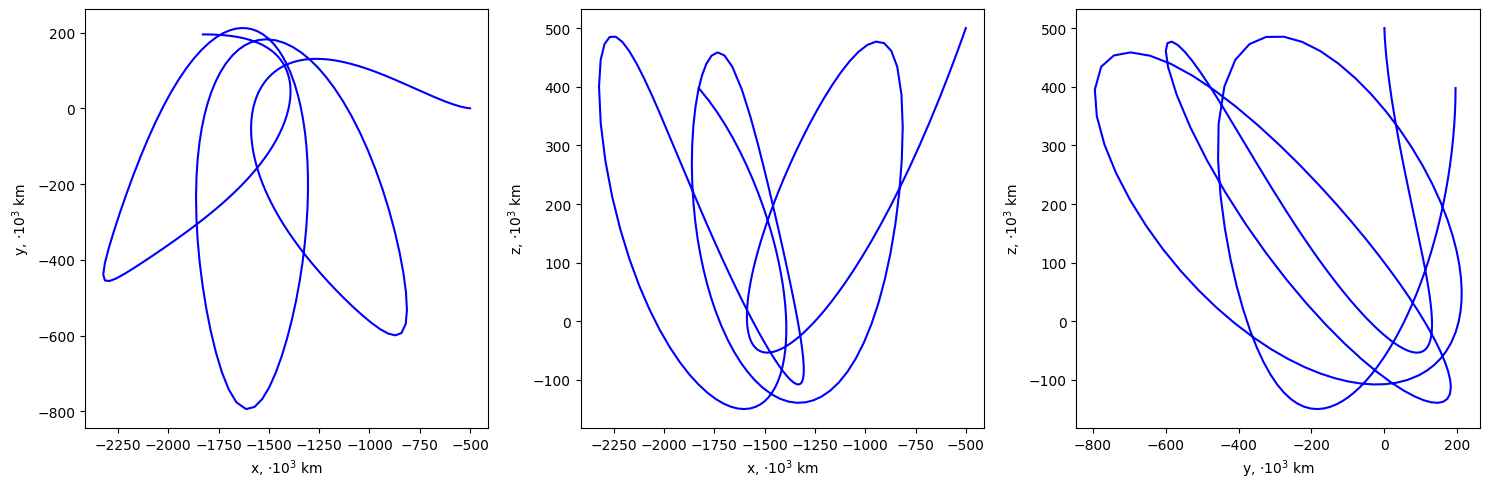

In [22]:
plotter.plot_proj(df, centers={'x':model.L2})

- by default plotter plots three projections: 'x-y', 'x-z', 'y-z'
- df can be DataFrame and numpy array
- centers argument translate coordinate system to specified center within specified axis

array([<Axes: xlabel='vx, km/s', ylabel='vy, km/s'>,
       <Axes: xlabel='vx, km/s', ylabel='vz, km/s'>], dtype=object)

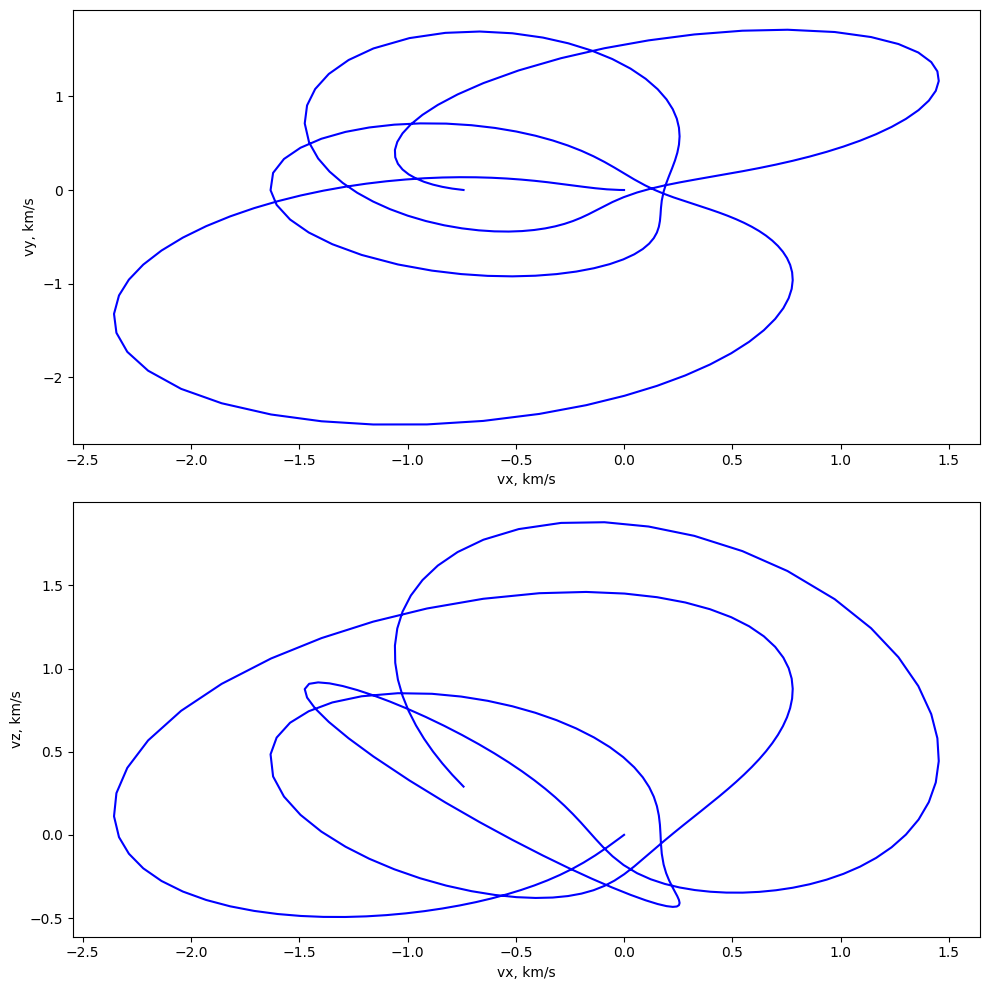

In [23]:
plotter.plot_proj(df, 
                  projections=('vx-vy', 'vx-vz',),
                  vertical=True,
                  fsize=(10,5))

### Events

OrbiPy supports event detection technique

Event consists of:
- value - event occur when event function reach this value (default = 0)
- direction - event occur when event function reach value at this direction (default = 0)
- terminal - integration terminates when terminal event occur (default = True)
- accurate - indicate that accurate state should be calculated at time of event (default = True)
- count - number of times event occurs (default = -1)
- other data which depends on event type

Available event types:

In [24]:
[s for s in dir(op) if s.startswith('event')]

['eventAX',
 'eventAY',
 'eventAZ',
 'eventAlphaX',
 'eventConeX',
 'eventDR',
 'eventFOV',
 'eventHyperboloidX',
 'eventInsidePathXY',
 'eventOmegaX',
 'eventParaboloidX',
 'eventR',
 'eventRdotV',
 'eventSPL',
 'eventSinT',
 'eventSplitLyapunov',
 'eventT',
 'eventVX',
 'eventVY',
 'eventVZ',
 'eventX',
 'eventY',
 'eventZ',
 'event_chain',
 'event_combine',
 'event_detector',
 'event_solout',
 'events']

### Create events

In [25]:
left = op.eventX(model.L2-1000000/model.R)
right = op.eventX(model.L2+1000000/model.R)

In [26]:
s0 = model.get_zero_state()
s0[0] = model.L2-1000001/model.R
left(0, s0)

np.float64(-6.684492070974102e-09)

In [27]:
s0[0] = model.L2-999999/model.R
left(0, s0)

np.float64(6.684491848929497e-09)

### Correction methods

#### Border correction
Uses 2 borders - 'left' and 'right' to calculate delta-v that delivers bounded motion within specified borders

In [28]:
# initial state
s0 = model.get_zero_state()
s0[0] = model.L2 - 500000/model.R
s0[2] = 500000/model.R

In [88]:
# borders
left = op.eventX(model.L2-1000000/model.R)
right = op.eventX(model.L2+500000/model.R)

In [89]:
# border correction instance
corr = op.border_correction(model, op.y_direction(), [left], [right])

In [90]:
# calculate delta-v
dv = corr.calc_dv(0.0, s0)
dv

array([ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
       -6.10351562e-17, -0.00000000e+00])

In [91]:
# apply correction
s0 += dv

In [92]:
df = model.prop(s0, 0.0, 4*np.pi)

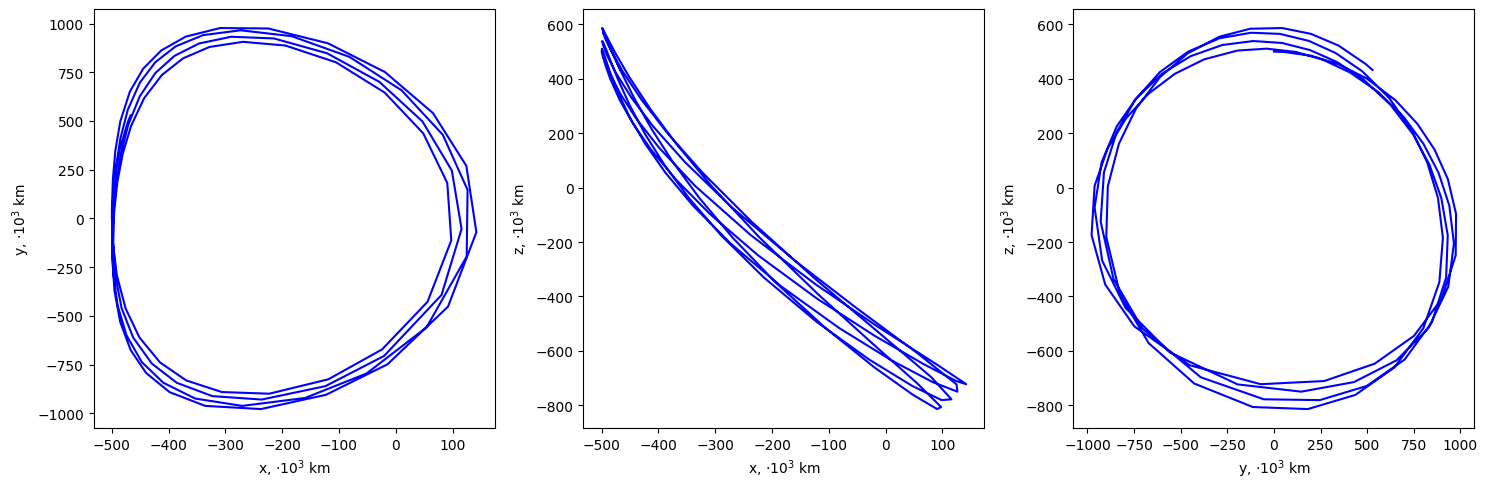

In [93]:
plotter.plot_proj(df, centers={'x':model.L2});

#### Border correction using rotated splitted Lyapunov orbit
Uses 2 borders - 'left' and 'right' to calculate delta-v that delivers bounded motion within specified borders

In [94]:
pmodel = op.crtbp3_model()
scale = plotter.scaler
pmodel.integrator.set_params(max_step=scale(1, 'd-nd'))

In [95]:
import pkg_resources
fname = pkg_resources.resource_filename(__name__, 'data/hlyapunov_sel1.csv')
fname

'data/hlyapunov_sel1.csv'

In [100]:
# make left and right borders by splitting rotated lyapunov orbit
# using default splitting angle 1.8461392981282345

left = op.eventSplitLyapunov(hldf.values[:,1:3], model.L1, flip=True, accurate=False)
right = op.eventSplitLyapunov(hldf.values[:,1:3], model.L1, flip=True, left=False, accurate=False)

In [101]:
# border correction instance
corr = op.border_correction(model, op.y_direction(), left, right)

In [102]:
# initial state
s0 = model.get_zero_state()
s0[0] = model.L1 + 500000/model.R
s0[2] = 500000/model.R

In [103]:
# calculate delta-v
dv = corr.calc_dv(0.0, s0)
dv

array([ 0.        ,  0.        ,  0.        , -0.        , -0.01584099,
       -0.        ])

In [104]:
# apply correction
s0 += dv

In [105]:
df = model.prop(s0, 0.0, 4*np.pi)

array([<Axes: xlabel='x, ${\\cdot}10^3$ km', ylabel='y, ${\\cdot}10^3$ km'>,
       <Axes: xlabel='x, ${\\cdot}10^3$ km', ylabel='z, ${\\cdot}10^3$ km'>,
       <Axes: xlabel='y, ${\\cdot}10^3$ km', ylabel='z, ${\\cdot}10^3$ km'>],
      dtype=object)

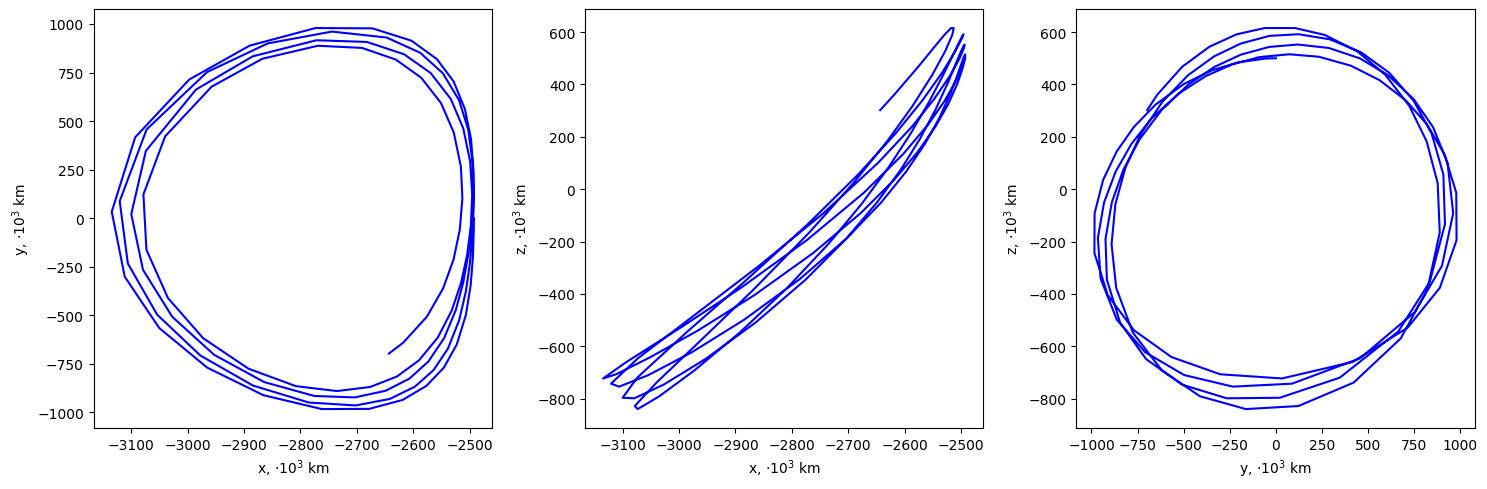

In [106]:
plotter.plot_proj(df, centers={'x':model.L2})

#### Maximum time within border
Uses closed border to calculate delta-v that maximizes time of motion within specified border

array([<Axes: xlabel='x, ${\\cdot}10^3$ km', ylabel='y, ${\\cdot}10^3$ km'>,
       <Axes: xlabel='x, ${\\cdot}10^3$ km', ylabel='z, ${\\cdot}10^3$ km'>,
       <Axes: xlabel='y, ${\\cdot}10^3$ km', ylabel='z, ${\\cdot}10^3$ km'>],
      dtype=object)

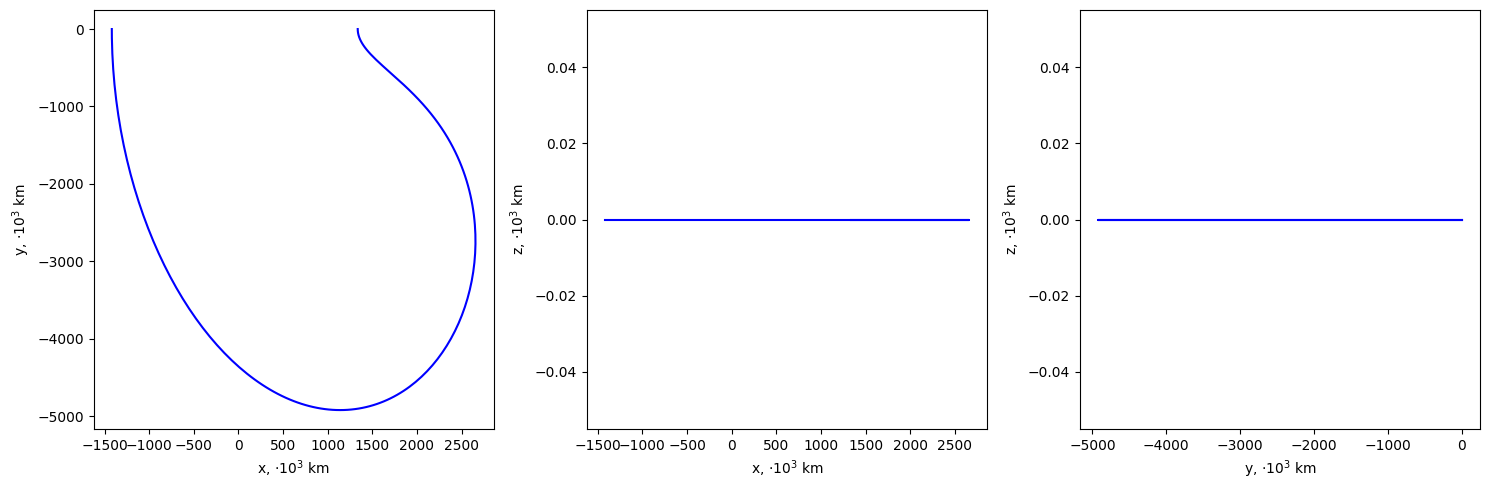

In [99]:
# load state vectors for horizontal lyapunov orbit from module's data folder
hls = np.loadtxt('../orbipy/data/hlyapunov_sel1.csv')
s0 = hls[-500] # take state for big orbit (not so big)

# integrate orbit with small time step (1 day)
hldf, _ = op.event_detector(pmodel, [op.eventY()]).prop(s0, 0., 100., last_state='last')
plotter.plot_proj(hldf, centers={'x':model.L1})

In [107]:
# initial state
s0 = model.get_zero_state()
s0[0] = model.L2 - 500000/model.R
s0[2] = 500000/model.R

In [108]:
# sphere with 1.5 million km radius and center in L2 point
sphere = op.eventR(model.L[1], 1500000/model.R)

In [109]:
# max time correction instance
corr2 = op.max_time_correction(model, op.y_direction(), [sphere])

In [110]:
# calculate delta-v
dv = corr2.calc_dv(0.0, s0)
dv

array([0.        , 0.        , 0.        , 0.        , 0.01556527,
       0.        ])

In [111]:
# apply correction
s0 += dv

In [112]:
df = model.prop(s0, 0.0, 4*np.pi)

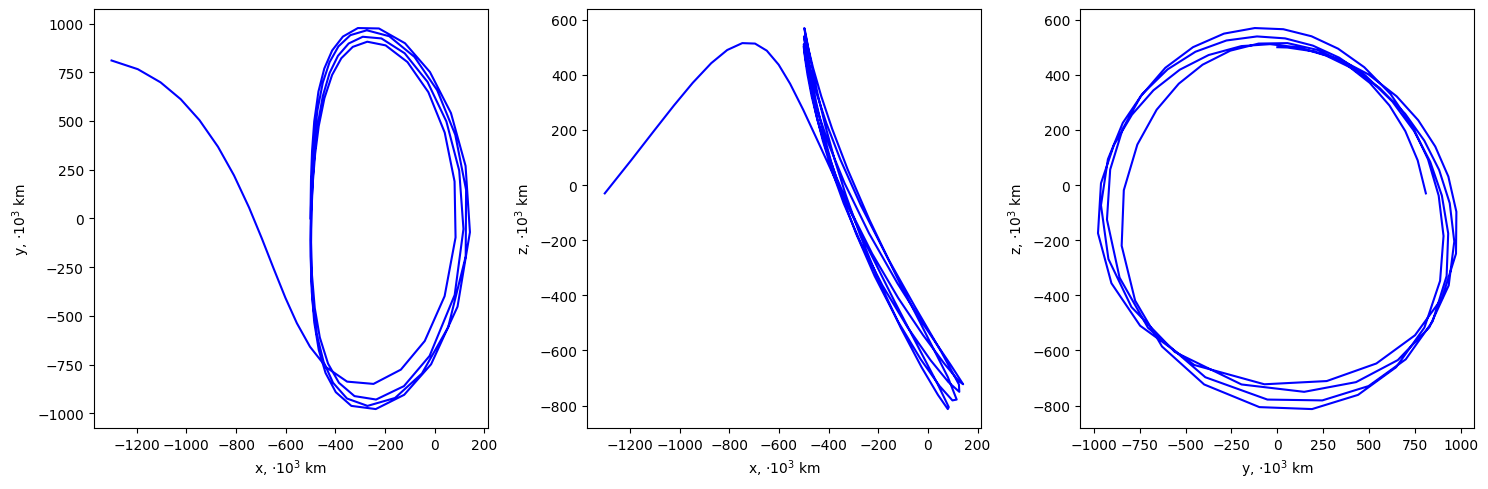

In [113]:
plotter.plot_proj(df, centers={'x':model.L2});

### Event detection

In [114]:
# event list
events = [op.eventX(model.L2, terminal=False), # 0
          op.eventY(terminal=False),           # 1
          op.eventZ(count=3)]                  # 2

# detector instance
det = op.event_detector(model, events)

In [115]:
# propagate and detect events
df, ev = det.prop(s0, 0.0, 100)

In [116]:
# result:
ev

,e,cnt,trm,t,x,y,z,vx,vy,vz
0,2.0,1.0,1.0,0.587195,1.007651,6.332963e-03,2.734905e-13,0.003781,0.003567,-0.008367
1,0.0,-1.0,0.0,1.118971,1.010032,4.762248e-03,-3.803565e-03,0.004031,-0.008585,-0.005007
2,1.0,-1.0,0.0,1.548398,1.010987,-1.084202e-18,-4.851795e-03,0.000034,-0.012391,0.000294
3,0.0,-1.0,0.0,1.982038,1.010032,-4.805463e-03,-3.544477e-03,-0.004066,-0.008524,0.005520
4,2.0,2.0,1.0,2.465811,1.007810,-6.442664e-03,3.842597e-14,-0.004134,0.002538,0.008330
5,1.0,-1.0,0.0,3.092414,1.006694,-9.348148e-14,3.407593e-03,0.000177,0.015424,-0.000718
6,2.0,3.0,1.0,3.647395,1.007580,6.104653e-03,1.219727e-18,0.003458,0.004275,-0.008711


- e - event index in events list
- cnt - serial number of event occasion
- trm - if event is terminal

/home/tka4nik/Workdir/diploma/orbipy/venv/lib64/python3.12/site-packages/matplotlib/text.py:897: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  x = float(self.convert_xunits(self._x))
/home/tka4nik/Workdir/diploma/orbipy/venv/lib64/python3.12/site-packages/matplotlib/text.py:898: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  y = float(self.convert_yunits(self._y))
/home/tka4nik/Workdir/diploma/orbipy/venv/lib64/python3.12/site-packages/matplotlib/text.py:756: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  posx = float(self.convert_xunits(self._x))
/home/tka4nik/Workdir/diploma/orbipy/venv/lib64/python3.12/site-packages/matplotlib/text.py:757: FutureWarning: Calling float on a single element Serie

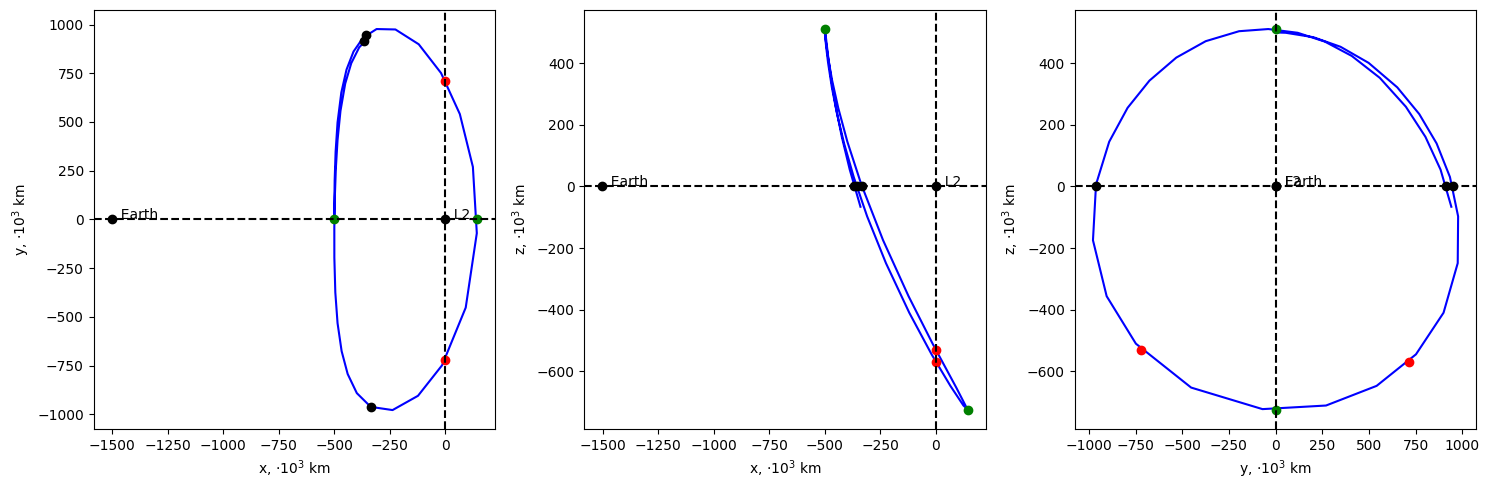

In [117]:
ax = plotter.plot_proj(df, centers={'x':model.L2})

colors = 'rgk'
for i in np.int32(np.sort(ev.e.unique())):
    plotter.plot_proj(ev.loc[ev.e==i], ax=ax, centers={'x':model.L2}, ls='', marker='o', colors=colors[i])
    
#plotter.plot_proj(ax=ax, plottables=[left,right,sphere],centers={'x':model.L2},
#                  colors='k',ls='--')
plotter.plot_proj(ax=ax, plottables=events,centers={'x':model.L2},
                  colors='k',ls='--');

plotter.plot_proj(ax=ax, plottables=[plotter.m, plotter.L2],centers={'x':model.L2},
                  colors='k',ls='',marker='o');

### Station-keeping

Station-keeping is a technique for keeping spacecraft on bounded orbit for large amount of time
Station-keeping process consists of:
- propagation of spacecraft state for specified time or up to specified event (evet list)
- calculation of delta-v according to specified correction method
- appliction of delta-v
- repetition of previous steps specified number of times

### Station-keeping with border correction method

In [119]:
# borders
left = op.eventX(model.L2-1000000/model.R)
right = op.eventX(model.L2+1000000/model.R)

In [120]:
# border correction instance
first_corr = op.border_correction(model, op.y_direction(), [left], [right])
corr = op.border_correction(model, op.x_direction(), [left], [right])

In [121]:
#  executed each pi time units
sk = op.simple_station_keeping(model, first_corr, corr)

In [122]:
# initial state
s0 = model.get_zero_state()
s0[0] = model.L2 - 500000/model.R
s0[2] = 500000/model.R

In [123]:
df = sk.prop(0.0, s0, N=20)

Simple station-keeping: 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 


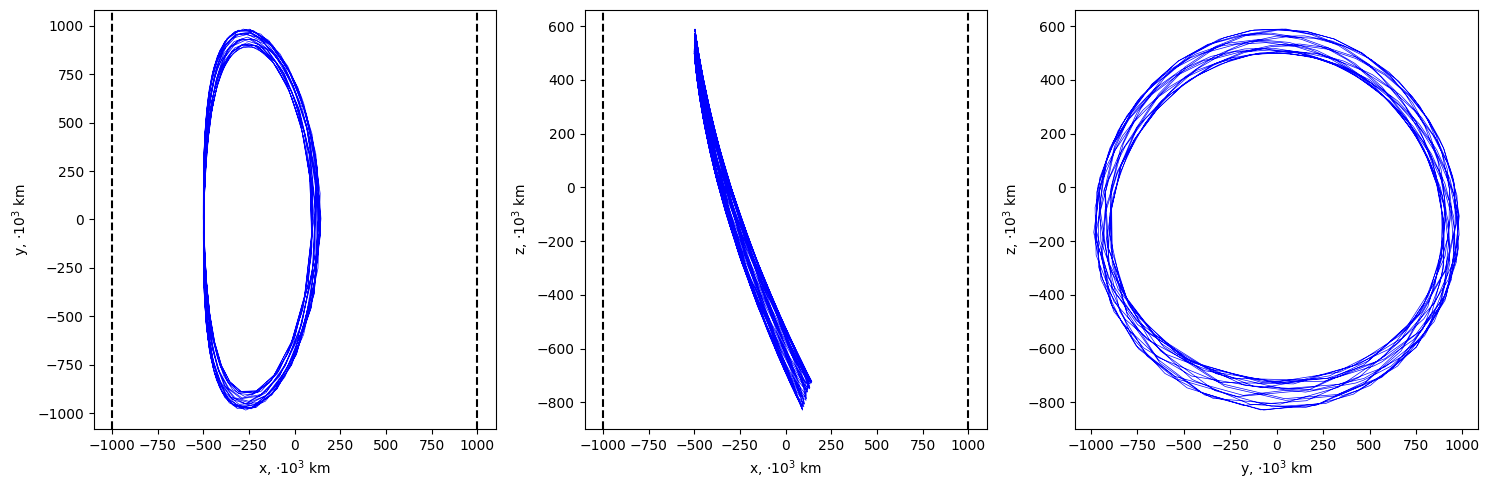

In [124]:
ax = plotter.plot_proj(df, centers={'x':model.L2}, linewidth=0.5);
plotter.plot_proj(ax=ax, plottables=[left,right],centers={'x':model.L2},
                  colors='k',ls='--');

### Station-keeping with maximum time in sphere correction method

In [125]:
# sphere with 1.5 million km radius and center in L2 point
sphere = op.eventR(model.L[1], 1500000/model.R, )

In [126]:
# max time correction instance
first_corr2 = op.max_time_correction(model, op.y_direction(), [sphere])
corr2 = op.max_time_correction(model, op.x_direction(), [sphere])

In [127]:
# station-keeping with border correction method executed each pi time units
sk2 = op.simple_station_keeping(model, first_corr2, corr2)

In [128]:
# initial state
s0 = model.get_zero_state()
s0[0] = model.L2 - 500000/model.R
s0[2] = 500000/model.R

In [129]:
df2 = sk2.prop(0.0, s0, N=20)

Simple station-keeping: 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 


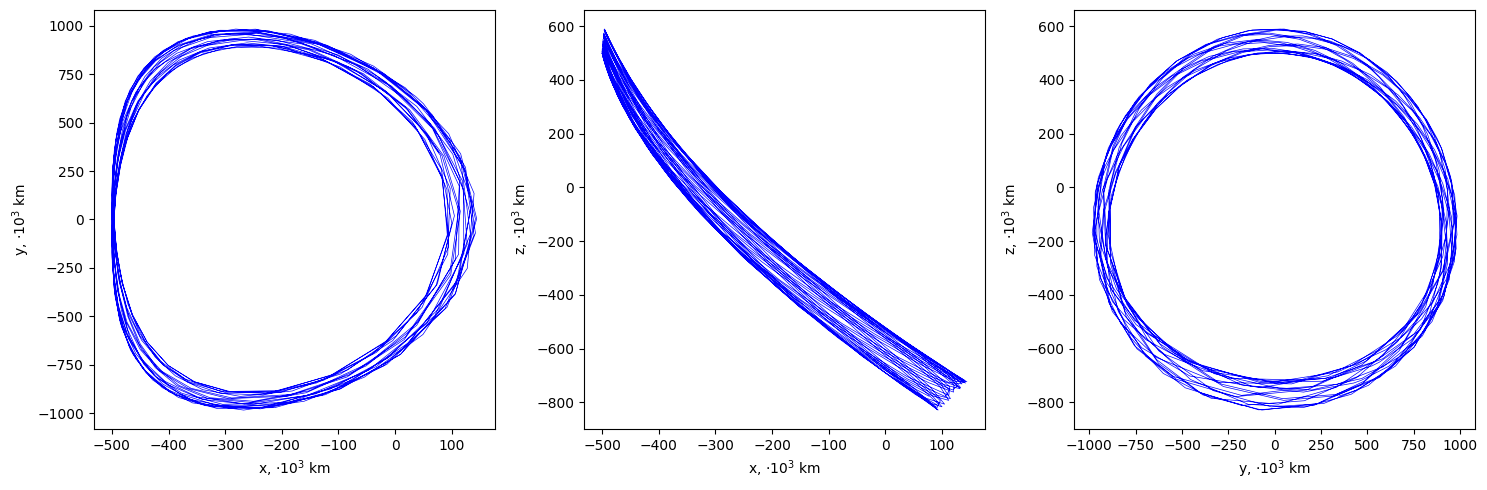

In [130]:
plotter.plot_proj(df2, centers={'x':model.L2}, linewidth=0.5);
plotter.plot_proj(ax=ax, plottables=[sphere],centers={'x':model.L2},
                  colors='k',ls='--');

### Station-keeping with corrections in unstable direction

In [131]:
# borders
left = op.eventX(model.L2-1500000/model.R)
right = op.eventX(model.L2+1000000/model.R)

In [132]:
# border correction instance
first_corr = op.border_correction(model, op.y_direction(), [left], [right])
stm_model = op.crtbp3_model(stm=True)
corr = op.border_correction(model, op.unstable_direction_stm(stm_model), [left], [right])

In [133]:
sk = op.simple_station_keeping(model, first_corr, corr, rev=2*np.pi)

In [134]:
# initial state (Big orbit!)
s0 = model.get_zero_state()
s0[0] = model.L2 - 1200000/model.R
s0[2] = 1600000/model.R

In [135]:
df = sk.prop(0.0, s0, N=20)

Simple station-keeping: 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 


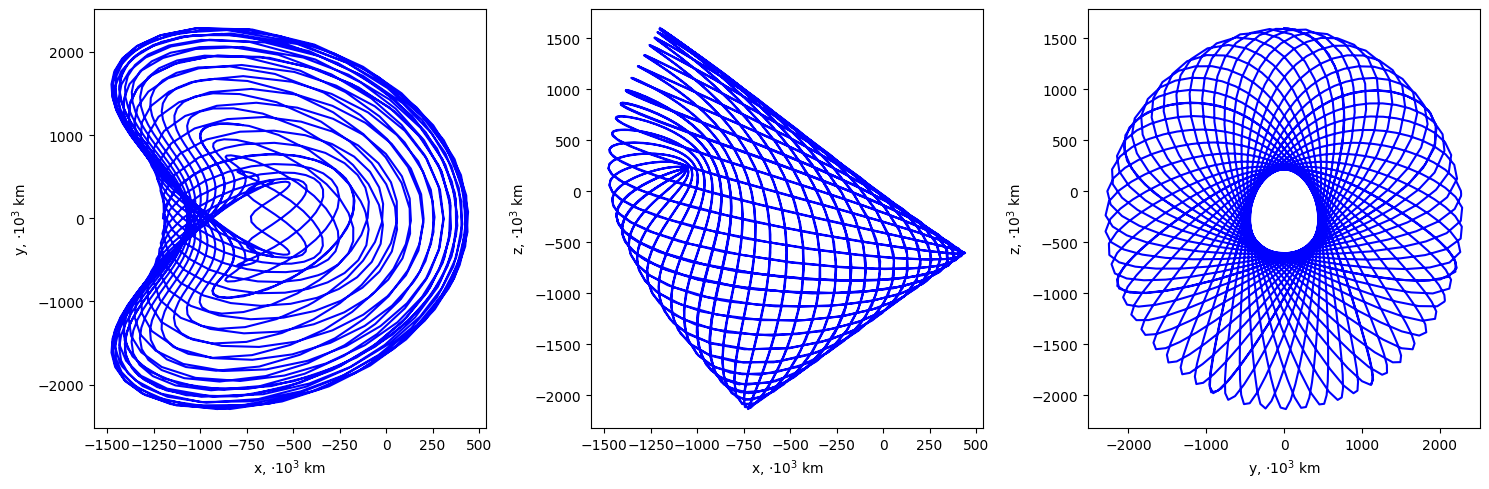

In [136]:
plotter.plot_proj(df, centers={'x':model.L2});

### Additional events calculation during station-keeping

In [137]:
events = [op.eventVX(terminal=False), # 0
          op.eventVY(terminal=False), # 1
          op.eventVZ(terminal=False)] # 2

In [138]:
# station-keeping with border correction method executed each pi time units
sk = op.simple_station_keeping(model, first_corr, corr, events=events)

In [139]:
# initial state
s0 = model.get_zero_state()
s0[0] = model.L2 - 500000/model.R
s0[2] = 500000/model.R

In [140]:
df = sk.prop(0.0, s0, N=20)

Simple station-keeping: 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 


In [141]:
# calculated delta-v during station-keeping
sk.dvout
# t    x    y    z    vx                     vy                    vz

array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  1.55652673e-02,
         0.00000000e+00],
       [ 3.14159265e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  5.07434674e-13,  6.43179542e-13,
         7.38434134e-14],
       [ 6.28318531e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  6.21133122e-14,  8.03727351e-14,
         3.08266010e-15],
       [ 9.42477796e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  7.04672456e-13,  9.14330233e-13,
        -2.80982332e-14],
       [ 1.25663706e+01,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  2.19537350e-13,  2.80801392e-13,
        -2.57040930e-14],
       [ 1.57079633e+01,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  7.39211101e-13,  9.19270229e-13,
        -1.31348591e-13],
       [ 1.88495559e+01,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00, -4.96110443e-13, -5.94988652e-13,
         1.1053892

In [142]:
# calculated events during station-keeping ()
sk.evout

array([[ 1.00000000e+00, -1.00000000e+00,  0.00000000e+00, ...,
         4.49000359e-03, -1.51788304e-18, -8.08483272e-03],
       [ 0.00000000e+00, -1.00000000e+00,  0.00000000e+00, ...,
        -8.91214186e-17, -1.23906928e-02,  3.33630910e-04],
       [ 2.00000000e+00, -1.00000000e+00,  0.00000000e+00, ...,
         2.84058654e-04, -1.23782524e-02, -1.08420217e-18],
       ...,
       [ 0.00000000e+00, -1.00000000e+00,  0.00000000e+00, ...,
         1.11130723e-18,  1.47688129e-02,  5.29738077e-04],
       [ 2.00000000e+00, -1.00000000e+00,  0.00000000e+00, ...,
         9.86012738e-05,  1.48599138e-02,  7.62465178e-17],
       [ 1.00000000e+00, -1.00000000e+00,  0.00000000e+00, ...,
         4.06357818e-03,  4.62412227e-17, -8.86071395e-03]])

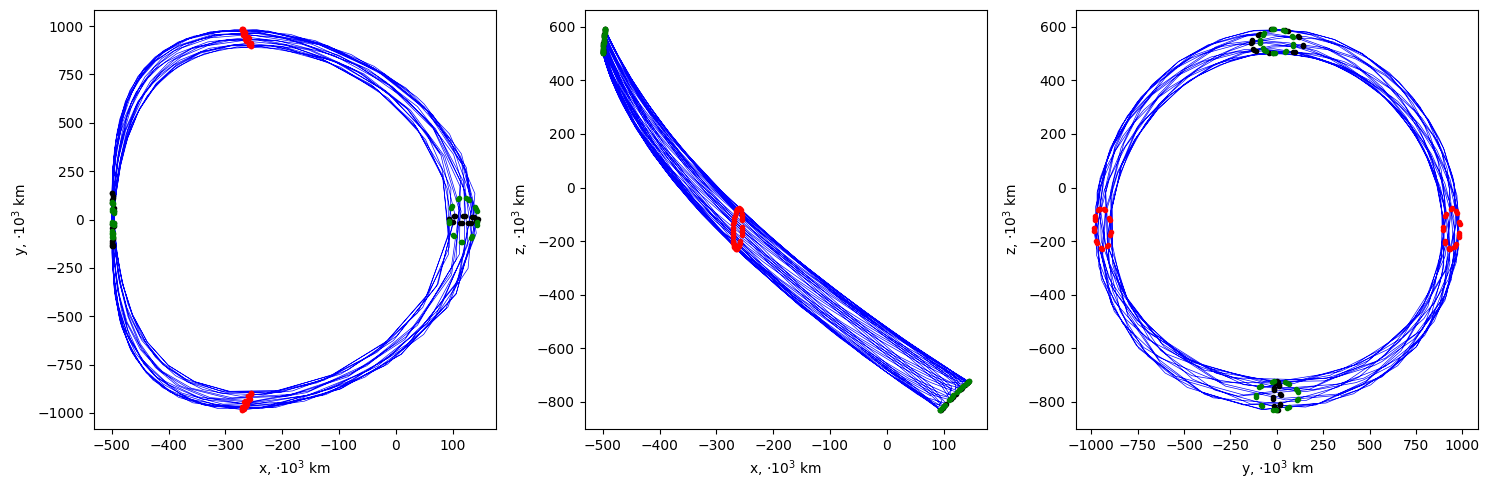

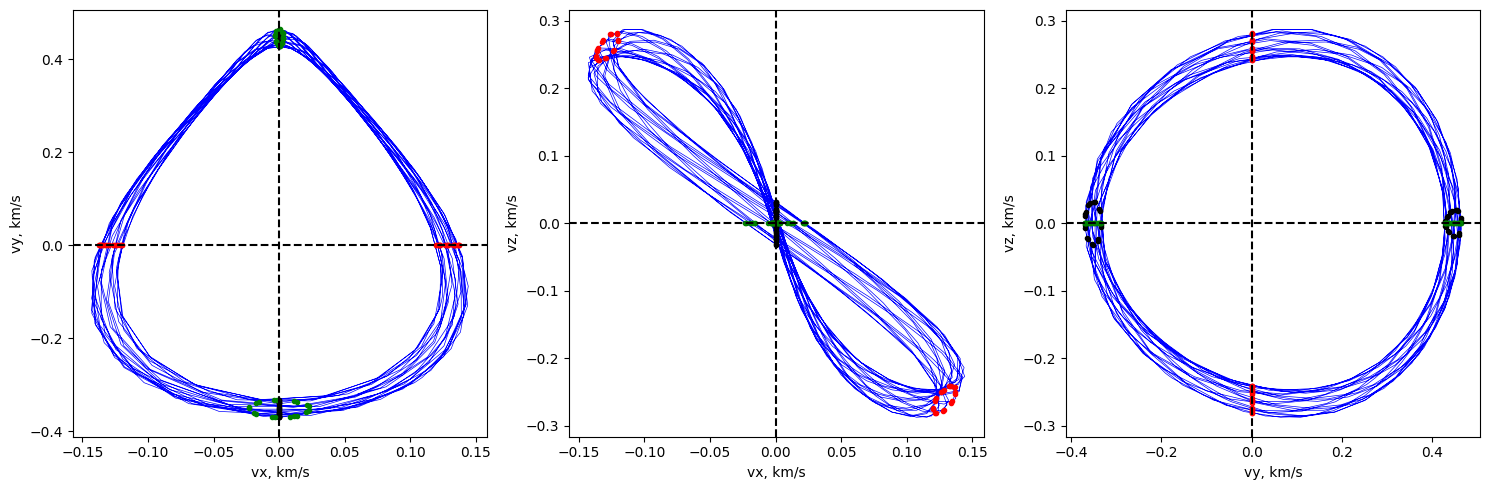

In [143]:
ax = plotter.plot_proj(df, centers={'x':model.L2}, linewidth=0.5)

colors = 'rgk'
for i in range(len(events)):
    plotter.plot_proj(sk.evout[sk.evout[:,0]==i,3:], 
                      ax=ax, 
                      centers={'x':model.L2}, 
                      ls='', 
                      marker='.', 
                      colors=colors[int(i)-1])
    
ax = plotter.plot_proj(df, projections=('vx-vy','vx-vz', 'vy-vz'),
                       centers={'x':model.L2}, linewidth=0.5)

colors = 'rgk'
for i in range(len(events)):
    plotter.plot_proj(sk.evout[sk.evout[:,0]==i,3:], 
                      ax=ax, 
                      projections=('vx-vy','vx-vz', 'vy-vz'),
                      centers={'x':model.L2}, 
                      ls='', 
                      marker='.', 
                      colors=colors[int(i)-1])
    
plotter.plot_proj(ax=ax, projections=('vx-vy','vx-vz', 'vy-vz'),
                  plottables=events,centers={'x':model.L2},
                  colors='k',ls='--');

### Manifold calculation

In [144]:
# get scaler from plotter
scale = plotter.scaler

In [145]:
det = op.event_detector(model, [op.eventY(count=2)])
dv = first_corr.calc_dv(0.0, s0)
s = s0 + dv
df, ev = det.prop(s, 0.0, 10, last_state='none')

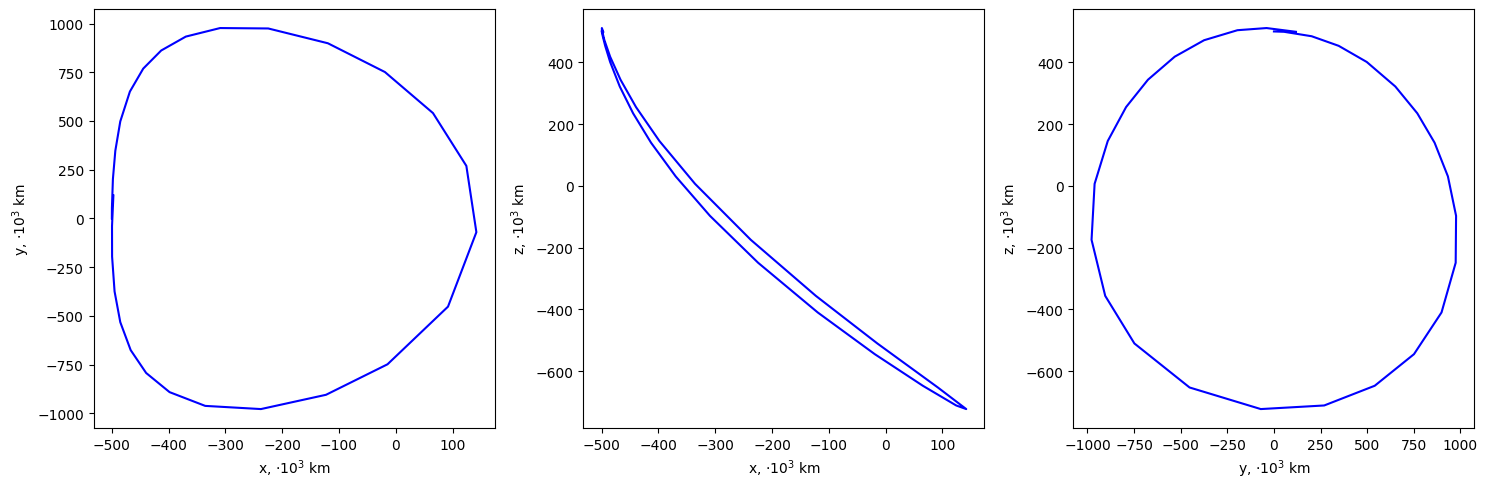

In [146]:
plotter.plot_proj(df, centers={'x':model.L2});

In [147]:
df.head()

,t,x,y,z,vx,vy,vz
0,0.000000,1.006689,0.000000,0.003342,0.000000,0.015565,0.000000
1,0.023319,1.006690,0.000363,0.003335,0.000073,0.015533,-0.000634
2,0.087770,1.006702,0.001353,0.003238,0.000294,0.015121,-0.002342
3,0.153493,1.006730,0.002321,0.003031,0.000582,0.014257,-0.003932
4,0.227547,1.006789,0.003327,0.002682,0.001011,0.012859,-0.005446


In [148]:
# create manifold object
man = op.manifold(model, df)

In [149]:
# calculate all branches of manifold
mdf = man.calc_manifold(maxt=3*np.pi)

-9.42477796076938
Manifold branch: stable positive , trajectories: 29
0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 
States count: 3984
-9.42477796076938
Manifold branch: stable negative , trajectories: 29
0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 
States count: 2340
9.42477796076938
Manifold branch: unstable positive , trajectories: 29
0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 
States count: 2315
9.42477796076938
Manifold branch: unstable negative , trajectories: 29
0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 
States count: 3864


In [150]:
# br - manifold branch index (index column in DataFrame):
# 0 - stable branch with positive disturbance
# 1 - stable branch with negative disturbance
# 2 - unstable branch with positive disturbance
# 3 - unstable branch with negative disturbance    

# tr - trajectory index

mdf.head()

,br,tr,t,x,y,z,vx,vy,vz
0,0.0,0.0,0.000000,1.006689,0.000000,0.003342,1.000000e-10,0.015565,0.000000
1,0.0,0.0,-0.023319,1.006690,-0.000363,0.003335,-7.288931e-05,0.015533,0.000634
2,0.0,0.0,-0.087770,1.006702,-0.001353,0.003238,-2.939721e-04,0.015121,0.002342
3,0.0,0.0,-0.153493,1.006730,-0.002321,0.003031,-5.823354e-04,0.014257,0.003932
4,0.0,0.0,-0.227547,1.006789,-0.003327,0.002682,-1.010595e-03,0.012859,0.005446


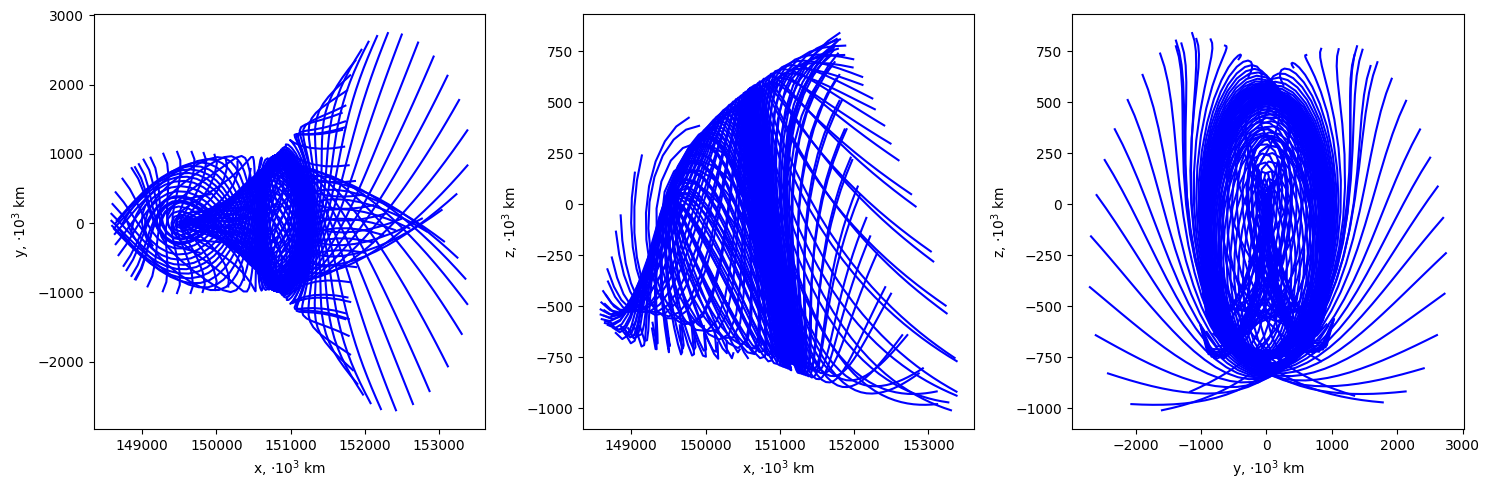

In [151]:
plotter.plot_manifold(mdf, method='intr');

### Events calculation on manifold

In [152]:
s0 = model.get_zero_state()
s0[0] = model.L2-277549/model.R
s0[2] = 200000/model.R
precise_model = op.crtbp3_model()
precise_model.integrator.set_params(max_step=scale(1, 'd-nd'))
det = op.event_detector(precise_model, [op.eventY(count=2)])
dv = first_corr.calc_dv(0.0, s0)
s = s0 + dv
df, ev = det.prop(s, 0.0, 10, last_state='last')

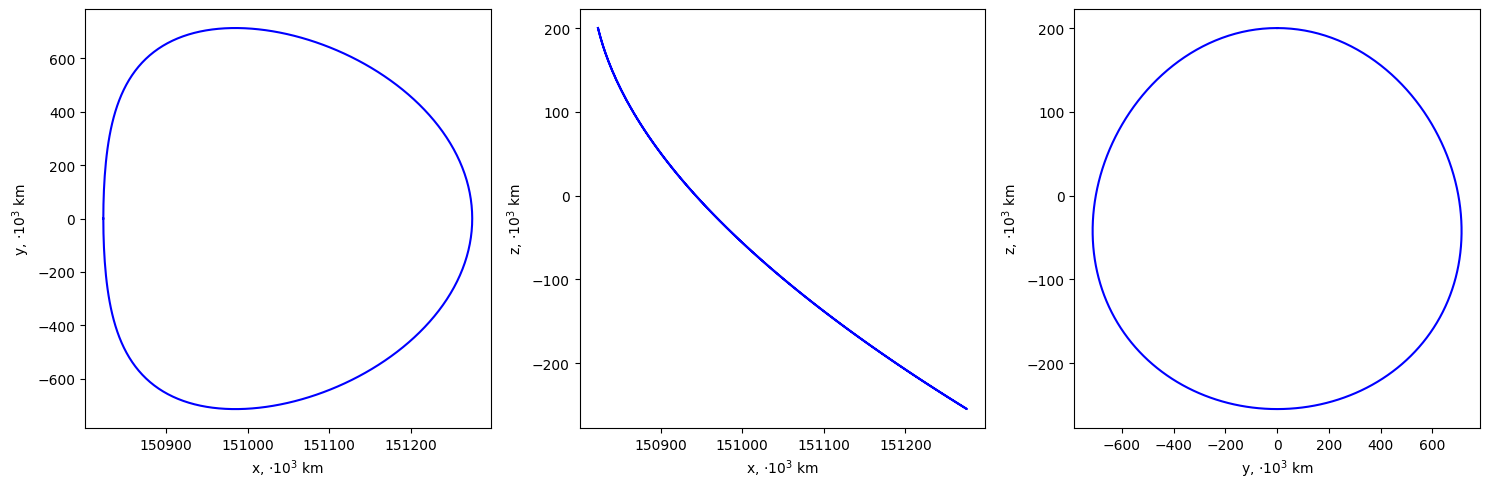

In [153]:
plotter.plot_proj(df);

In [155]:
# local pericenter event related to Earth
evRdotV = op.eventRdotV(center=np.array([model.mu1,0,0]),
                        terminal=True,
                        direction=1)

# time after which pericenter should be found
T = scale(300,'d-nd')
evT = op.eventT(T, terminal=True)

# event chain: evT occur -> evRdotV occur
evCh = op.event_chain([evT, evRdotV])

man = op.manifold(model, df)
# calculate only unstable-negative branch
mdf, edf = man.calc_branch('un', disturbance=1e-7, 
                      maxt=2*np.pi, events=[evCh]);
mdf.head()

6.283185307179586
Manifold branch: unstable negative , trajectories: 182
0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181 
States count: 13100


,br,tr,t,x,y,z,vx,vy,vz
0,3.0,0.0,0.000000,1.008176,0.000000,0.001337,-1.000000e-07,0.010435,0.000000
1,3.0,0.0,0.025591,1.008177,0.000267,0.001334,5.369662e-05,0.010416,-0.000214
2,3.0,0.0,0.108805,1.008189,0.001123,0.001288,2.469108e-04,0.010092,-0.000890
3,3.0,0.0,0.193742,1.008221,0.001952,0.001185,5.064405e-04,0.009381,-0.001519
4,3.0,0.0,0.293687,1.008291,0.002831,0.001001,9.203292e-04,0.008144,-0.002132


/home/tka4nik/Workdir/diploma/orbipy/venv/lib64/python3.12/site-packages/matplotlib/text.py:897: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  x = float(self.convert_xunits(self._x))
/home/tka4nik/Workdir/diploma/orbipy/venv/lib64/python3.12/site-packages/matplotlib/text.py:898: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  y = float(self.convert_yunits(self._y))
/home/tka4nik/Workdir/diploma/orbipy/venv/lib64/python3.12/site-packages/matplotlib/text.py:756: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  posx = float(self.convert_xunits(self._x))
/home/tka4nik/Workdir/diploma/orbipy/venv/lib64/python3.12/site-packages/matplotlib/text.py:757: FutureWarning: Calling float on a single element Serie

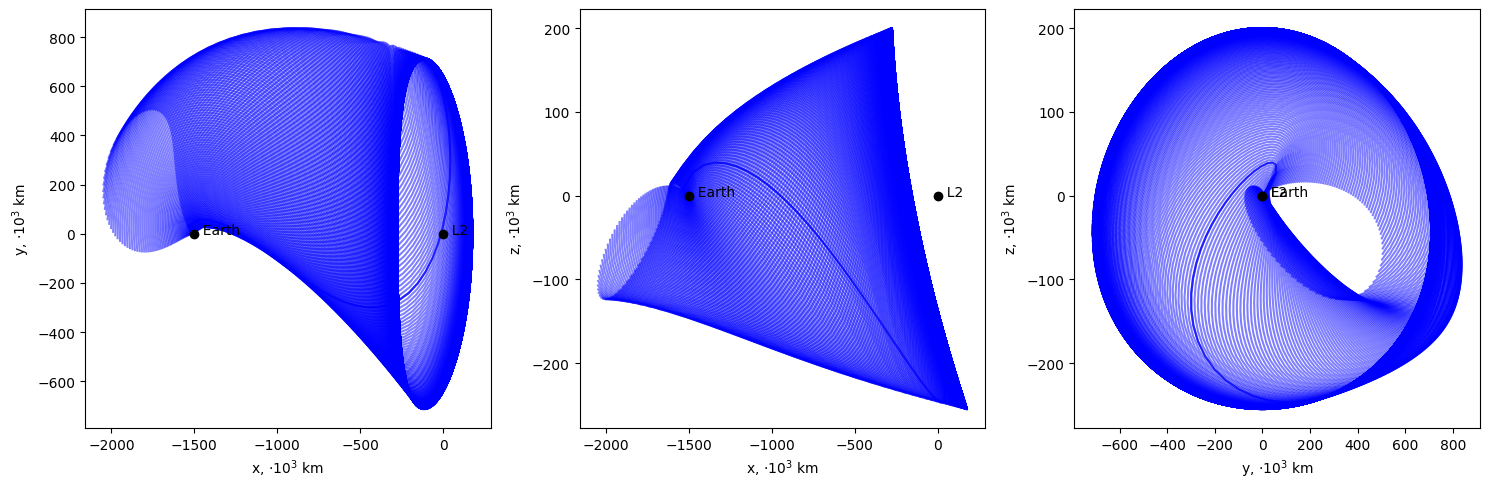

In [156]:
ax = plotter.plot_manifold(mdf, method='intr', centers={'x':model.L2}, alpha=0.5);
plotter.plot_proj(ax=ax, plottables=[plotter.L2, plotter.m], centers={'x':model.L2},
                  colors='k',marker='o');

/home/tka4nik/Workdir/diploma/orbipy/venv/lib64/python3.12/site-packages/matplotlib/text.py:897: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  x = float(self.convert_xunits(self._x))
/home/tka4nik/Workdir/diploma/orbipy/venv/lib64/python3.12/site-packages/matplotlib/text.py:898: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  y = float(self.convert_yunits(self._y))
/home/tka4nik/Workdir/diploma/orbipy/venv/lib64/python3.12/site-packages/matplotlib/text.py:756: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  posx = float(self.convert_xunits(self._x))
/home/tka4nik/Workdir/diploma/orbipy/venv/lib64/python3.12/site-packages/matplotlib/text.py:757: FutureWarning: Calling float on a single element Serie

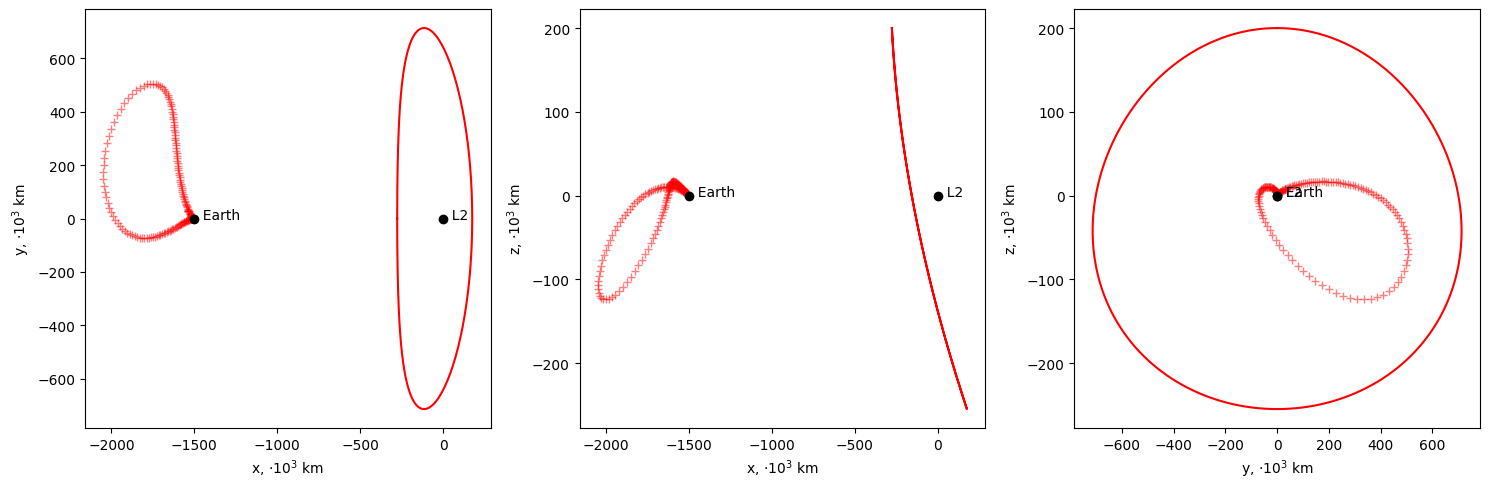

In [157]:
# plot initial orbit and event states
ax = plotter.plot_proj(df, centers={'x':model.L2}, colors=colors)

plotter.plot_proj(edf, ax=ax, centers={'x':model.L2}, 
                  colors=colors, alpha=0.5, marker='+', ls='');

plotter.plot_proj(ax=ax, plottables=[plotter.L2, plotter.m], centers={'x':model.L2},
                  colors='k',marker='o');